In [53]:
using Jacobi
using PyPlot
include("../../HPFEM.jl/src/HPFEM.jl");

In [73]:
M= 19
Q=M + 2
nel = 1
nnodes = nel + 1
a=-5
b= 5
idir = []#,nnodes]
ze = linspace(-1,1,M) 
zc = Jacobi.chebyshev_zeros(M)
lagr = HPFEM.Lagrange1d(zc);
quad = HPFEM.QuadType(Q);
base = HPFEM.Basis1d(lagr, quad);
nodes = collect(linspace(a, b, nnodes));
lmap = HPFEM.locmap(base)
dof = HPFEM.DofMap1d(lmap, nnodes, idir);


LoadError: LoadError: BoundsError: attempt to access 0x1 Array{Int64,2}
  at index [1,1]
while loading In[73], in expression starting on line 15

In [64]:

elemento = [HPFEM.Element1d(e, nodes[e], nodes[e+1], base) for e = 1:nel]
solver = HPFEM.CholeskySC(dof, HPFEM.BBSymTri);



In [65]:
for e = 1:nel
    Ae = HPFEM.mass_matrix(base, elemento[e])
    HPFEM.add_local_matrix(solver, e, Ae)
end

In [66]:
fun(x) = sin(2*pi*x)
fun(x) = 1./(1 + x.^2)
x = linspace(a,b,101)
#plot(x,fun(x));

In [67]:
Fe = zeros(HPFEM.nmodes(lmap), nel)

for e = 1:nel
    fe = fun(elemento[e].x)
    HPFEM.add_rhs!(base, elemento[e], fe, sub(Fe, :, e))
end


In [68]:
HPFEM.solve!(solver, Fe)


19x1 Array{Float64,2}:
 0.000990482
 0.0548931  
 0.051351   
 0.0937705  
 0.103587   
 0.175283   
 0.268527   
 0.431801   
 0.779346   
 0.993398   
 0.779346   
 0.431801   
 0.268527   
 0.175283   
 0.103587   
 0.0937705  
 0.051351   
 0.0548931  
 0.000990482

In [69]:
nξ = 101
ξ = collect(linspace(-1,1,nξ));
ϕ = zeros(nξ, M)
for i = 1:M
    ϕ[:,i] = base(ξ, i)
end

Ue = ϕ * Fe;


In [70]:
Ue[2,1]

0.05535908784817519

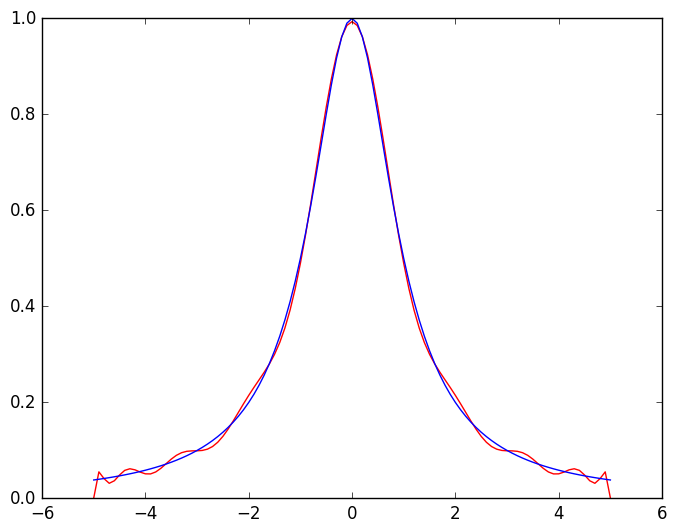

0.03747105662738147

In [71]:
## using PyPlot
x = [(1-ξ)*el.a/2 + (1+ξ)*el.b/2 for el in elemento]
maxerr = -1000000
for e = 1:nel
    uu = fun(x[e])
    err = maxabs(uu-Ue[:,e])
    if err > maxerr maxerr = err end
        
    plot(x[e], Ue[:,e], "r", x[e], uu, "b")
    #xlim(-5.5,-4.5)
end
maxerr